### Importing Libraries

In [2]:
import re
import pandas as pd
import numpy as np
import nltk
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
df = pd.read_excel("D:/Sentiment Analysis Notebook/data.xlsx")
df.head()

,Date,Time,contact,Message,Sentiment
0,2021-05-08,13:05,Abhishek Subk,Ok,1
1,2021-05-08,13:41,Kishlaya,I haven't received link to join the meeting,0
2,2021-05-08,13:41,Kishlaya,Can I join with previous link?,1
3,2021-05-08,13:41,Shishir Singh Subk,Yes,1
4,2021-05-08,13:42,Abhishek Subk,This is the daily sync up meeting link.,1


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [5]:
df.groupby('contact')['Message'].count().reset_index().sort_values(by='Message',ascending=False)

,contact,Message
4,Pranay Subk,104
5,Prashant Subk,36
2,Kishlaya,24
0,Abhishek Subk,21
8,Shishir Singh Subk,18
1,Daivakari Subk,15
3,Naveen Data Analyst Sub-K,13
9,Vinod Subk,6
6,Sagar Subk,5
7,Seshu Subk,5


## Word Cloud

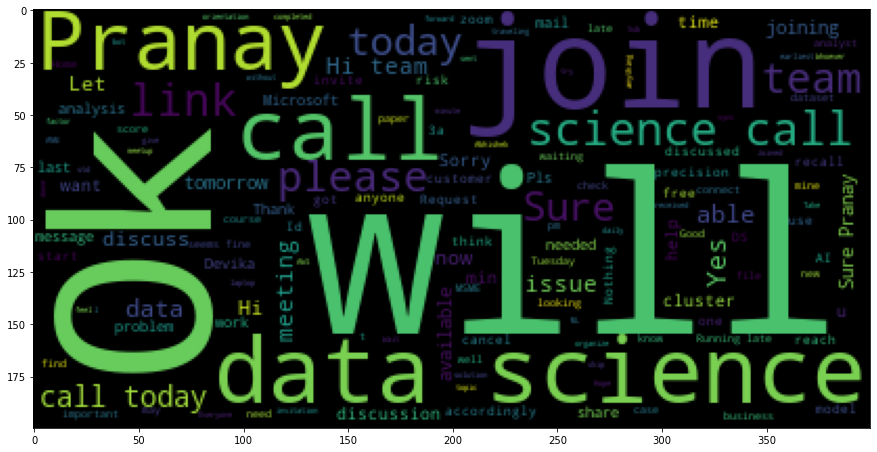

In [6]:
from wordcloud import WordCloud
df.Message = df.Message.astype('str')
mess = ' '.join(df.Message.values)

mess[:200]

#Initiating WordCloud
word_cloud = WordCloud().generate(mess)
#
##Raw cloud.
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.show()

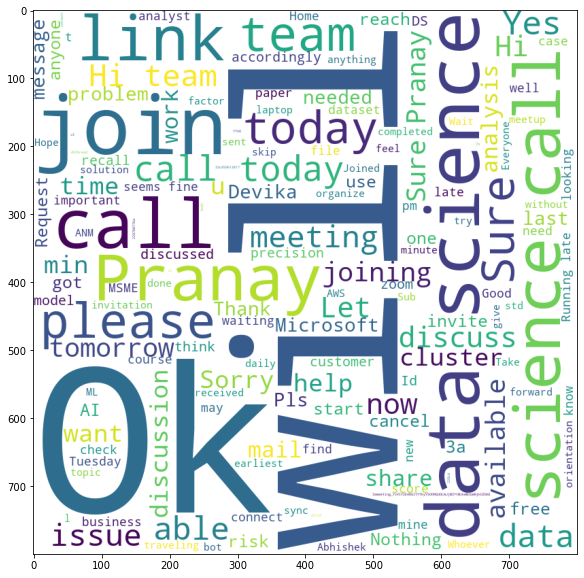

In [7]:
#Beautifying
word_cloud = WordCloud(width=800,height=800,background_color='white',
                      max_words=150).generate(mess)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.show()

# Word Frequency

In [8]:
#Getting words and its frequency in dict-key-values.
y = {} 
for i in mess.split(' '): 
    y[i] = y.get(i,0)+1
#conversion:
freq = {'words':list(y.keys()) , 'freq':list(y.values())}

mydata=pd.DataFrame(freq)
mydata.sort_values(by='freq',ascending=False)

,words,freq
5,to,58
7,the,54
1,I,48
114,call,37
26,in,29
67,for,27
96,be,24
38,you,24
46,on,24
91,and,23


# Data Cleaning

In [9]:
df.head()

,Date,Time,contact,Message,Sentiment
0,2021-05-08,13:05,Abhishek Subk,Ok,1
1,2021-05-08,13:41,Kishlaya,I haven't received link to join the meeting,0
2,2021-05-08,13:41,Kishlaya,Can I join with previous link?,1
3,2021-05-08,13:41,Shishir Singh Subk,Yes,1
4,2021-05-08,13:42,Abhishek Subk,This is the daily sync up meeting link.,1


In [10]:
#making the words in lower case
df["Message_uniformed"] = df["Message"].str.lower()

In [11]:
#Removing the punctuations
df["Message_uniformed"] = df['Message_uniformed'].str.replace('[^\w\s]','')

In [12]:
#Removing Stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sagar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
elements_to_remove = ["no","not","nor"]
stop_words = [element for element in stop if element not in elements_to_remove]
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

In [14]:
df['Message_uniformed'] = df['Message_uniformed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [15]:
#Removing unwanted rows
test1 = df[~df['Message_uniformed'].isin(['media omitted'])]

In [16]:
#Removing unwanted website URLS
test1['Message_uniformed'] = test1['Message_uniformed'].replace(to_replace=r'^https?:\/\/.*[\r\n]*',value='',regex=True)

In [17]:
test1.head(10)

,Date,Time,contact,Message,Sentiment,Message_uniformed
0,2021-05-08,13:05,Abhishek Subk,Ok,1,ok
1,2021-05-08,13:41,Kishlaya,I haven't received link to join the meeting,0,havent received link join meeting
2,2021-05-08,13:41,Kishlaya,Can I join with previous link?,1,join previous link
3,2021-05-08,13:41,Shishir Singh Subk,Yes,1,yes
4,2021-05-08,13:42,Abhishek Subk,This is the daily sync up meeting link.,1,daily sync meeting link
5,2021-05-08,13:42,Kishlaya,Ohok,1,ohok
6,2021-05-08,17:32,Abhishek Subk,Sure Pranay,1,sure pranay
7,2021-05-08,18:56,Abhishek Subk,Yes Pranay,1,yes pranay
8,2021-05-08,18:56,Pranay Subk,This is what they did in 2018-19. I am hoping ...,1,201819 hoping bot backend
9,2021-05-08,18:56,Abhishek Subk,Let me check,1,let check


### Tokenizing

In [18]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sagar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Lemmatizing

In [19]:
#Lemmatizing the data
nltk.download('wordnet')

wn = nltk.WordNetLemmatizer()

def lemmatization(token_txt):
    text = [wn.lemmatize(word) for word in word_tokenize(token_txt)]
    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sagar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
test1['Message_lemmatized'] = test1['Message_uniformed'].apply(lambda x : lemmatization(x))
test1

,Date,Time,contact,Message,Sentiment,Message_uniformed,Message_lemmatized
0,2021-05-08,13:05,Abhishek Subk,Ok,1,ok,[ok]
1,2021-05-08,13:41,Kishlaya,I haven't received link to join the meeting,0,havent received link join meeting,"[havent, received, link, join, meeting]"
2,2021-05-08,13:41,Kishlaya,Can I join with previous link?,1,join previous link,"[join, previous, link]"
3,2021-05-08,13:41,Shishir Singh Subk,Yes,1,yes,[yes]
4,2021-05-08,13:42,Abhishek Subk,This is the daily sync up meeting link.,1,daily sync meeting link,"[daily, sync, meeting, link]"
5,2021-05-08,13:42,Kishlaya,Ohok,1,ohok,[ohok]
6,2021-05-08,17:32,Abhishek Subk,Sure Pranay,1,sure pranay,"[sure, pranay]"
7,2021-05-08,18:56,Abhishek Subk,Yes Pranay,1,yes pranay,"[yes, pranay]"
8,2021-05-08,18:56,Pranay Subk,This is what they did in 2018-19. I am hoping ...,1,201819 hoping bot backend,"[201819, hoping, bot, backend]"
9,2021-05-08,18:56,Abhishek Subk,Let me check,1,let check,"[let, check]"


# Vader Sentiment Analysis

In [21]:
data=test1.dropna()
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments=SentimentIntensityAnalyzer()
data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
data["negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
data["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["Message"]]
data["compound"]=[sentiments.polarity_scores(i)["compound"] for i in data["Message"]]

data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sagar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Date,Time,contact,Message,Sentiment,Message_uniformed,Message_lemmatized,positive,negative,neutral,compound
0,2021-05-08,13:05,Abhishek Subk,Ok,1,ok,[ok],1.000,0.0,0.000,0.2960
1,2021-05-08,13:41,Kishlaya,I haven't received link to join the meeting,0,havent received link join meeting,"[havent, received, link, join, meeting]",0.268,0.0,0.732,0.2960
2,2021-05-08,13:41,Kishlaya,Can I join with previous link?,1,join previous link,"[join, previous, link]",0.355,0.0,0.645,0.2960
3,2021-05-08,13:41,Shishir Singh Subk,Yes,1,yes,[yes],1.000,0.0,0.000,0.4019
4,2021-05-08,13:42,Abhishek Subk,This is the daily sync up meeting link.,1,daily sync meeting link,"[daily, sync, meeting, link]",0.000,0.0,1.000,0.0000


In [22]:
compound=data.groupby('contact')['compound'].agg(['count','sum']).reset_index()
compound['compound_score']=compound['sum']/compound['count']*100
compound.sort_values(by='compound_score',ascending=False)

,contact,count,sum,compound_score
9,Vinod Subk,6,1.8545,30.908333
3,Naveen Data Analyst Sub-K,13,3.8771,29.823846
0,Abhishek Subk,21,3.3987,16.184286
6,Sagar Subk,5,0.7364,14.728000
7,Seshu Subk,5,0.6392,12.784000
2,Kishlaya,24,3.0241,12.600417
5,Prashant Subk,36,4.3924,12.201111
4,Pranay Subk,104,12.1509,11.683558
8,Shishir Singh Subk,18,1.9905,11.058333
1,Daivakari Subk,15,1.1128,7.418667


In [81]:
data['Score'] = data['compound'].apply(lambda c: '1' if c >= 0 else '0')
data

,Date,Time,contact,Message,Sentiment,Message_uniformed,Message_lemmatized,positive,negative,neutral,compound,Score
0,2021-05-08,13:05,Abhishek Subk,Ok,1,ok,[ok],1.000,0.000,0.000,0.2960,1
1,2021-05-08,13:41,Kishlaya,I haven't received link to join the meeting,0,havent received link join meeting,"[havent, received, link, join, meeting]",0.268,0.000,0.732,0.2960,1
2,2021-05-08,13:41,Kishlaya,Can I join with previous link?,1,join previous link,"[join, previous, link]",0.355,0.000,0.645,0.2960,1
3,2021-05-08,13:41,Shishir Singh Subk,Yes,1,yes,[yes],1.000,0.000,0.000,0.4019,1
4,2021-05-08,13:42,Abhishek Subk,This is the daily sync up meeting link.,1,daily sync meeting link,"[daily, sync, meeting, link]",0.000,0.000,1.000,0.0000,1
5,2021-05-08,13:42,Kishlaya,Ohok,1,ohok,[ohok],0.000,0.000,1.000,0.0000,1
6,2021-05-08,17:32,Abhishek Subk,Sure Pranay,1,sure pranay,"[sure, pranay]",0.697,0.000,0.303,0.3182,1
7,2021-05-08,18:56,Abhishek Subk,Yes Pranay,1,yes pranay,"[yes, pranay]",0.730,0.000,0.270,0.4019,1
8,2021-05-08,18:56,Pranay Subk,This is what they did in 2018-19. I am hoping ...,1,201819 hoping bot backend,"[201819, hoping, bot, backend]",0.157,0.000,0.843,0.4215,1
9,2021-05-08,18:56,Abhishek Subk,Let me check,1,let check,"[let, check]",0.000,0.000,1.000,0.0000,1


## SMOTE (Minority Over Sampling)

In [57]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [58]:
x_smote , y_smote = smote.fit_resample(X,y)
print(x_smote.shape,y_smote.shape)

(442, 1) (442, 1)


## Model Training

In [24]:
data["Score"] = data["Score"].astype(int)

In [79]:
X = data[['Score']]

In [82]:
X.head()

,Score
0,1
1,1
2,1
3,1
4,1


In [26]:
y = data[['Sentiment']]

In [27]:
y.value_counts()

Sentiment
1            221
0             26
dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3,random_state=109)

### Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
from sklearn import metrics
y_pred=classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8646616541353384


In [62]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[63  5]
 [13 52]]


In [36]:
#Before SMOTETomek
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.14      0.20      0.17         5
           1       0.94      0.91      0.93        70

    accuracy                           0.87        75
   macro avg       0.54      0.56      0.55        75
weighted avg       0.89      0.87      0.88        75



In [63]:
#After SMOTETomek
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        65
           1       0.83      0.93      0.88        68

    accuracy                           0.86       133
   macro avg       0.87      0.86      0.86       133
weighted avg       0.87      0.86      0.86       133



### Gaussian Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [66]:
gnb.fit(X_train, y_train)

GaussianNB()

In [67]:
pred = gnb.predict(X_test)

In [68]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.8646616541353384


In [45]:
#Before SMOTE
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[64  6]
 [ 4  1]]


In [69]:
#After SMOTE
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[63  5]
 [13 52]]


In [46]:
#Before SMOTE
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.14      0.20      0.17         5
           1       0.94      0.91      0.93        70

    accuracy                           0.87        75
   macro avg       0.54      0.56      0.55        75
weighted avg       0.89      0.87      0.88        75



In [70]:
#After SMOTE
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        65
           1       0.83      0.93      0.88        68

    accuracy                           0.86       133
   macro avg       0.87      0.86      0.86       133
weighted avg       0.87      0.86      0.86       133



### Support Vector Machine

In [71]:
from sklearn import svm, datasets
model = svm.SVC(kernel='rbf', C = 30, gamma = 'auto' )
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8646616541353384

# HyperParameter Tuning...

### Grid Search CV (Cross Validation)

In [72]:
import warnings
warnings.filterwarnings('ignore')

In [73]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(svm.SVC(gamma = 'auto'), {
    'C': [1, 10, 20],
    'kernel': ['rbf','linear']
}, cv = 5, return_train_score = False)

clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.00225754, 0.00205579, 0.0021873 , 0.00178165, 0.0018023 ,
        0.00020576]),
 'std_fit_time': array([3.84041711e-04, 9.82948190e-05, 3.87064891e-04, 3.90761560e-04,
        3.84044706e-04, 4.11510468e-04]),
 'mean_score_time': array([0.00172286, 0.0010241 , 0.00120416, 0.00101171, 0.00119863,
        0.00308275]),
 'std_score_time': array([5.29959731e-04, 1.89497006e-04, 3.96112752e-04, 1.94457210e-05,
        7.47241994e-04, 6.16550446e-03]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'ker

In [74]:
df = pd.DataFrame(clf.cv_results_)
df[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.886674
1,1,linear,0.886674
2,10,rbf,0.886674
3,10,linear,0.886674
4,20,rbf,0.886674
5,20,linear,0.886674


In [75]:
clf.best_score_

0.8866737176097302

In [76]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

## Different models with different Hyperparameters

In [77]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [78]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.886674,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.886674,{'n_estimators': 1}
2,logistic_regression,0.886674,{'C': 1}
